In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, RandomRotation, RandomContrast, RandomBrightness
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf

2023-07-16 17:06:34.825563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-07-16 17:06:36.145921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-16 17:06:36.150802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-16 17:06:36.152728: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Definitions

In [3]:
WIDTH, HEIGHT = IMAGE_SIZE = (256, 256)
DEPTH = 3
DATASET_PATH = "dataset"
EPOCS = 200

# Data Preprocessing

### Preprocessing the Training set

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       validation_split = 0.2, brightness_range=(.3, .7))

training_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=16,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "training")
test_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=16,
                                                     seed=17,
                                                     class_mode = 'sparse',
                                                     subset = "validation")

# save_to_dir='/home/resized',save_prefix='N',save_format='jpeg'
# rotation_range = 75,

Found 548 images belonging to 5 classes.
Found 134 images belonging to 5 classes.


In [5]:
class_indices = training_set.class_indices
num_classes = len(class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=len(class_indices))
class_indices

{'9V': 0, 'AA': 1, 'AAA': 2, 'C': 3, 'D': 4}

# Building the CNN


In [6]:
model = Sequential()
# model.add(RandomRotation(0.1))
model.add(Conv2D(32, 3, activation='relu', input_shape=(HEIGHT, WIDTH, DEPTH)))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))

2023-07-16 17:06:36.240688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-16 17:06:36.242748: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-16 17:06:36.244627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [8]:
history = model.fit(x = training_set, validation_data = test_set, epochs = EPOCS)

Epoch 1/200


2023-07-16 17:06:36.671229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-16 17:06:37.091136: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-07-16 17:06:37.211118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-16 17:06:37.525838: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x6b45d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-16 17:06:37.525870: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device 

35/35 [==============================] - ETA: 0s - loss: 1.5600 - accuracy: 0.4142

2023-07-16 17:06:40.331106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


35/35 [==============================] - 4s 60ms/step - loss: 1.5600 - accuracy: 0.4142 - val_loss: 1.3134 - val_accuracy: 0.4552
Epoch 2/200
35/35 [==============================] - 2s 44ms/step - loss: 1.1841 - accuracy: 0.4872 - val_loss: 0.9750 - val_accuracy: 0.5000
Epoch 3/200
35/35 [==============================] - 2s 44ms/step - loss: 1.0279 - accuracy: 0.5803 - val_loss: 0.9691 - val_accuracy: 0.6418
Epoch 4/200
35/35 [==============================] - 2s 45ms/step - loss: 0.8937 - accuracy: 0.6168 - val_loss: 0.9145 - val_accuracy: 0.6269
Epoch 5/200
35/35 [==============================] - 2s 45ms/step - loss: 0.7479 - accuracy: 0.6679 - val_loss: 0.7568 - val_accuracy: 0.6567
Epoch 6/200
35/35 [==============================] - 2s 45ms/step - loss: 0.6946 - accuracy: 0.7226 - val_loss: 0.8587 - val_accuracy: 0.6045
Epoch 7/200
35/35 [==============================] - 2s 44ms/step - loss: 0.5963 - accuracy: 0.7518 - val_loss: 0.7578 - val_accuracy: 0.6940
Epoch 8/200
35/35 

35/35 [==============================] - 2s 44ms/step - loss: 0.0296 - accuracy: 0.9872 - val_loss: 1.1159 - val_accuracy: 0.7090
Epoch 59/200
35/35 [==============================] - 2s 44ms/step - loss: 0.1079 - accuracy: 0.9708 - val_loss: 1.1309 - val_accuracy: 0.6418
Epoch 60/200
35/35 [==============================] - 2s 44ms/step - loss: 0.1574 - accuracy: 0.9343 - val_loss: 0.8892 - val_accuracy: 0.7164
Epoch 61/200
35/35 [==============================] - 2s 44ms/step - loss: 0.0931 - accuracy: 0.9562 - val_loss: 0.7137 - val_accuracy: 0.7836
Epoch 62/200
35/35 [==============================] - 2s 44ms/step - loss: 0.0999 - accuracy: 0.9708 - val_loss: 0.7516 - val_accuracy: 0.7313
Epoch 63/200
35/35 [==============================] - 2s 44ms/step - loss: 0.0784 - accuracy: 0.9745 - val_loss: 0.6321 - val_accuracy: 0.7388
Epoch 64/200
35/35 [==============================] - 2s 44ms/step - loss: 0.0501 - accuracy: 0.9854 - val_loss: 0.5536 - val_accuracy: 0.7687
Epoch 65/200

35/35 [==============================] - 2s 44ms/step - loss: 0.1116 - accuracy: 0.9599 - val_loss: 1.2957 - val_accuracy: 0.7164
Epoch 116/200
35/35 [==============================] - 2s 43ms/step - loss: 0.1299 - accuracy: 0.9544 - val_loss: 1.1680 - val_accuracy: 0.7015
Epoch 117/200
35/35 [==============================] - 2s 44ms/step - loss: 0.1639 - accuracy: 0.9434 - val_loss: 0.7508 - val_accuracy: 0.7761
Epoch 118/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0748 - accuracy: 0.9708 - val_loss: 1.1671 - val_accuracy: 0.6940
Epoch 119/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0473 - accuracy: 0.9872 - val_loss: 0.8026 - val_accuracy: 0.7388
Epoch 120/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.8142 - val_accuracy: 0.7612
Epoch 121/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.7169 - val_accuracy: 0.7463
Epoch 

Epoch 172/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0467 - accuracy: 0.9872 - val_loss: 0.9280 - val_accuracy: 0.7761
Epoch 173/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0163 - accuracy: 0.9964 - val_loss: 0.9670 - val_accuracy: 0.7090
Epoch 174/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.8588 - val_accuracy: 0.7761
Epoch 175/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0075 - accuracy: 0.9964 - val_loss: 0.9002 - val_accuracy: 0.7687
Epoch 176/200
35/35 [==============================] - 2s 43ms/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.9971 - val_accuracy: 0.7239
Epoch 177/200
35/35 [==============================] - 2s 44ms/step - loss: 0.0281 - accuracy: 0.9872 - val_loss: 1.0659 - val_accuracy: 0.6791
Epoch 178/200
35/35 [==============================] - 2s 42ms/step - loss: 0.0298 - accuracy: 0.9872 - val_loss: 1.0131 - val_accuracy:

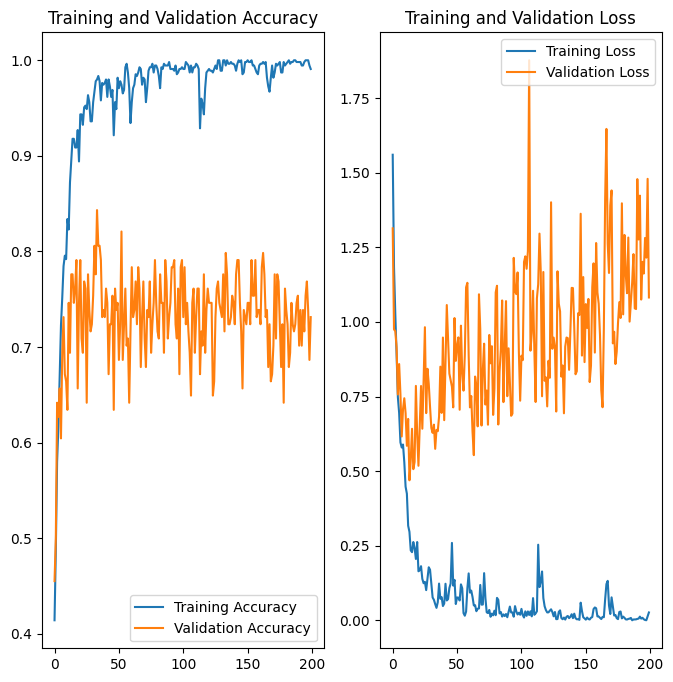

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print(f"{test_acc=}")
print(f"{test_loss=}")

2023-07-16 17:11:52.336571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9/9 - 0s - loss: 1.3014 - accuracy: 0.7015 - 287ms/epoch - 32ms/step
test_acc=0.7014925479888916
test_loss=1.3014460802078247


# Saving the model

In [11]:
MODEL = f'models/model_w{WIDTH}_acc{test_acc}_{datetime.now().isoformat()}'
model.save(MODEL)

2023-07-16 17:11:52.807778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,254,254,32]
	 [[{{node inputs}}]]
2023-07-16 17:11:52.826420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-07-16 17:11:52.981976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,254,254,32]
	 [[{{node inputs}}]]
20

INFO:tensorflow:Assets written to: models/model_w256_acc0.7014925479888916_2023-07-16T17:11:52.626733/assets


INFO:tensorflow:Assets written to: models/model_w256_acc0.7014925479888916_2023-07-16T17:11:52.626733/assets


## Converting to TF Lite

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [13]:
tfmodel = converter.convert()

2023-07-16 17:11:53.725600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,254,254,32]
	 [[{{node inputs}}]]
2023-07-16 17:11:53.743981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-07-16 17:11:53.861466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,254,254,32]
	 [[{{node inputs}}]]
20

INFO:tensorflow:Assets written to: /tmp/tmpz6do2a4g/assets


INFO:tensorflow:Assets written to: /tmp/tmpz6do2a4g/assets
2023-07-16 17:11:54.718606: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-16 17:11:54.718629: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-16 17:11:54.718864: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpz6do2a4g
2023-07-16 17:11:54.719892: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-07-16 17:11:54.719901: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpz6do2a4g
2023-07-16 17:11:54.722841: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-07-16 17:11:54.723751: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-16 17:11:54.789411: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [14]:
f = tf.io.gfile.GFile(f'{MODEL}.tflite', 'wb')
f.write(tfmodel)
f.close()

In [15]:
f'{MODEL}.tflite'

'models/model_w256_acc0.7014925479888916_2023-07-16T17:11:52.626733.tflite'